In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
data = pd.read_csv('Financial Analytics data.csv')

In [ ]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [ ]:
data.shape

(488, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [ ]:
data.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,9
Sales Qtr - Crore,123
Unnamed: 4,394


In [ ]:
# Dropping the "Unnamed: 4" column since it's mostly incomplete and seems irrelevant
df = data.drop(columns=['Unnamed: 4'])

In [ ]:
# Handle missing values
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median(), inplace=True)
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median(), inplace=True)

In [ ]:
# Summary statistics for numerical columns
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,27708.961086,3610.168955
std,145.884078,58963.329098,9684.943920
min,1.000000,3017.070000,47.240000
25%,122.750000,4879.612500,725.732500
50%,252.500000,9885.050000,1278.300000
75%,378.250000,23400.815000,2084.097500
max,500.000000,583436.720000,110666.930000


In [ ]:
#  the visual style
sns.set(style="whitegrid")

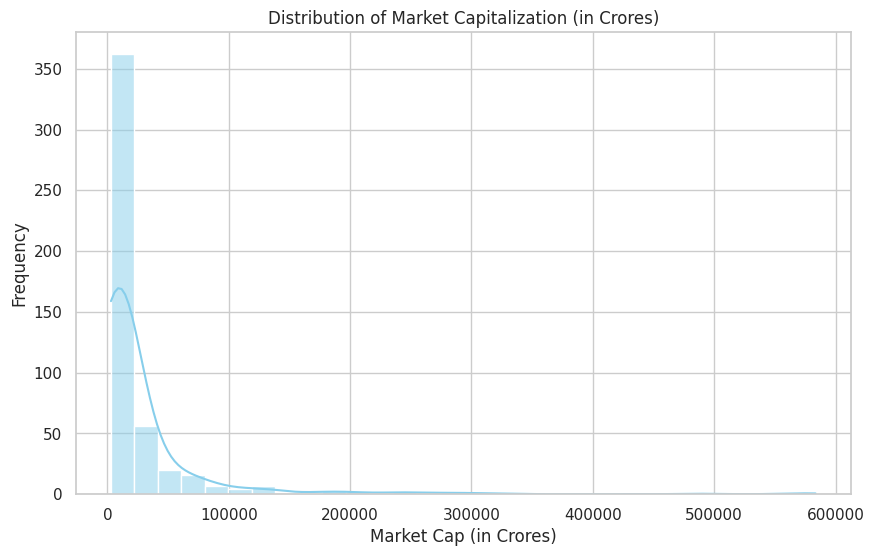

In [ ]:
# Plotting the distribution of Market Cap
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Market Capitalization (in Crores)')
plt.xlabel('Market Cap (in Crores)')
plt.ylabel('Frequency')
plt.show()

### Insights
The market capitalization distribution is right-skewed, indicating that most companies have a lower market cap, with a few having significantly higher values.

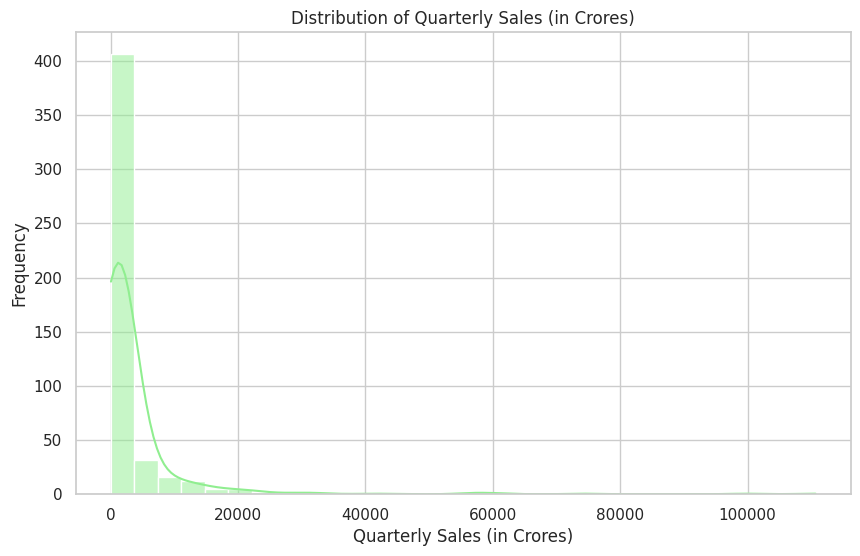

In [ ]:
# Plotting the distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Qtr - Crore'], kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Quarterly Sales (in Crores)')
plt.xlabel('Quarterly Sales (in Crores)')
plt.ylabel('Frequency')
plt.show()

### Insights
Similar to market capitalization, the quarterly sales distribution is also right-skewed, with most companies having lower sales figures, and a few outliers with very high sales.

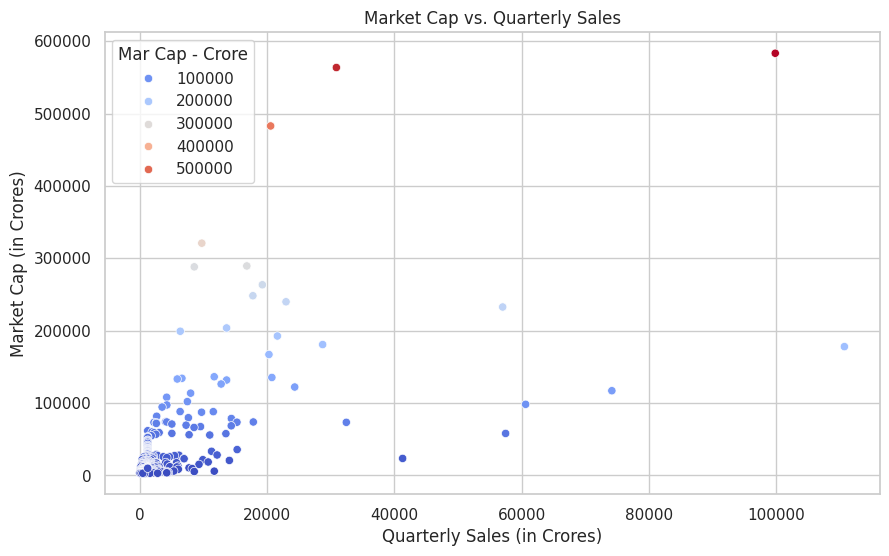

In [ ]:
# Scatter plot to investigate the relationship between Market Cap and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=df, hue='Mar Cap - Crore', palette='coolwarm')
plt.title('Market Cap vs. Quarterly Sales')
plt.xlabel('Quarterly Sales (in Crores)')
plt.ylabel('Market Cap (in Crores)')
plt.show()


### Insights
*   The scatter plot shows a positive relationship between market capitalization and quarterly sales, with companies having higher sales tending to have a higher market cap.
*   The correlation coefficient between market capitalization and quarterly sales is approximately 0.62, indicating a moderate to strong positive correlation.



In [ ]:
# Correlation between Market Cap and Sales
correlation = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])
print(f'Correlation between Market Cap and Quarterly Sales: {correlation}')

Correlation between Market Cap and Quarterly Sales: 0.6204889718974033


### Key Insights


*   Positive Correlation: Companies with higher sales generally tend to have a higher market capitalization, though other factors may also be at play.
*   Skewed Distributions: Both market capitalization and sales distributions are heavily skewed, with a small number of companies dominating the high-end values.

